In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
# importing library
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout,MaxPooling2D

2024-04-02 21:49:12.791182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 21:49:12.791237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 21:49:12.792700: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# #loading data

In [3]:
df_train = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
df_test = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [6]:
y_train = df_train["label"]
y_test = df_test["label"]

In [7]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

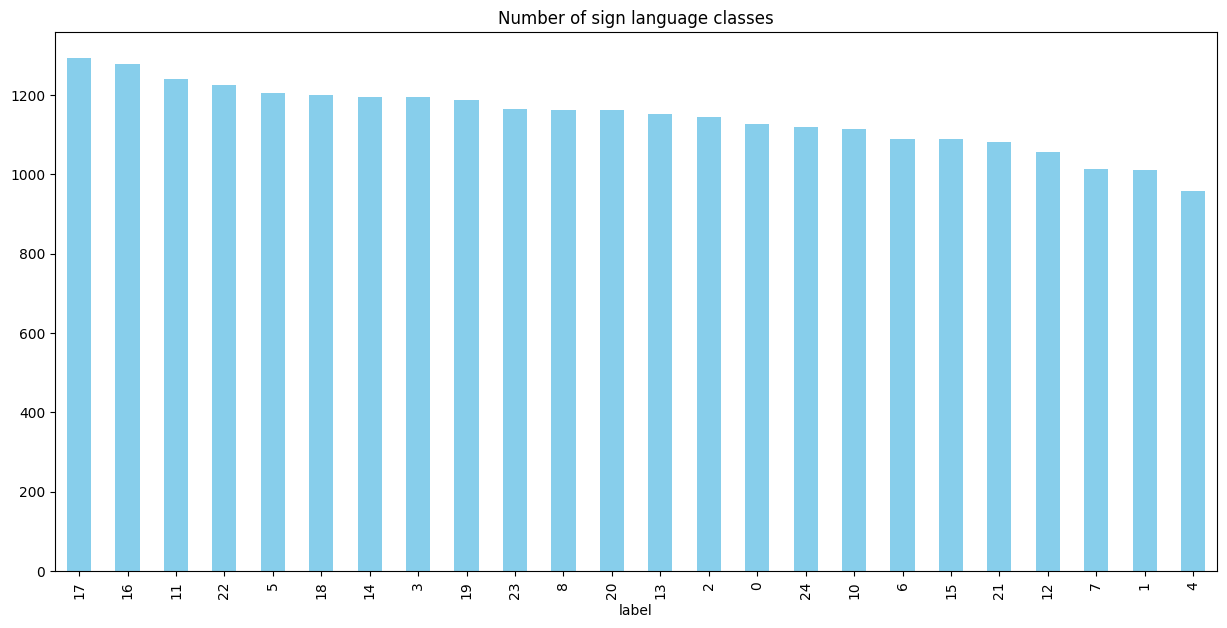

In [8]:
# visiual number of Sign Language classes
plt.figure(figsize=(15,7))

y_train.value_counts().sort_values(ascending=False).plot(kind="bar",color='skyblue')
plt.title("Number of sign language classes")
plt.show()

In [9]:
x_train=df_train.drop(["label"],axis=1)
x_test=df_test.drop(["label"],axis=1)

## preprocessing data

In [10]:
#converting the range of the pixel data from 0-255 to 0-1
x_train = x_train / 255.0

x_test = x_test / 255.0

In [11]:
# reshape  data
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [12]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

### visualization

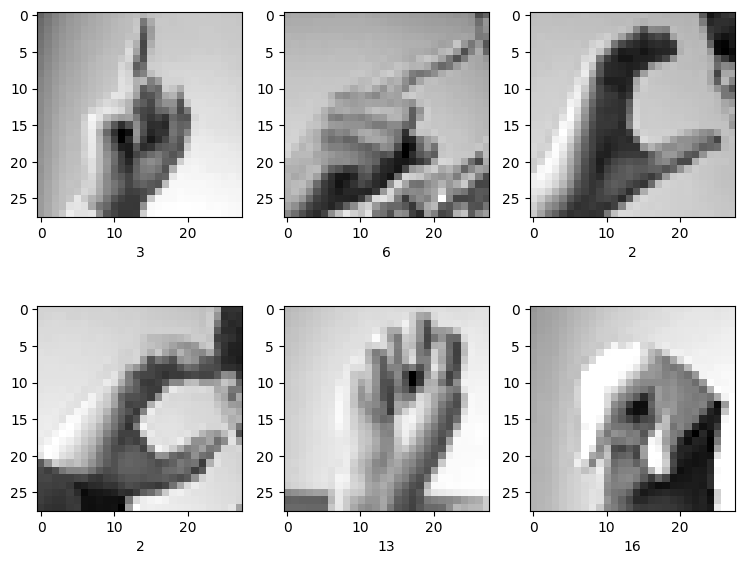

In [13]:
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel((y_train[i]))
    
plt.show()

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes=25)

### modeling

In [15]:
from tensorflow.keras import Sequential
model = Sequential()

#feature extraction
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same' ,input_shape=(28, 28, 1)))
model.add(MaxPool2D((2,2) ,  padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(.2))


model.add(Conv2D(64, (3, 3), padding = 'same',activation='relu'))
model.add(MaxPool2D(2,2) )
model.add(BatchNormalization())
model.add(Dropout(.2))


model.add(Conv2D(64, (3, 3) , padding = 'same', activation='relu'))
model.add(MaxPool2D(2,2) )
model.add(BatchNormalization())
model.add(Dropout(.2))

# model.add(Conv2D(32, (3, 3) , padding = 'same', activation='relu'))
# model.add(MaxPool2D(2,2) )
# model.add(BatchNormalization())






#classifier

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.25))
model.add(Dense(126, activation='relu'))
model.add(Dense(25, activation='softmax'))



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 126)            │        64,638 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         3,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,309 (1.82 MB)

 Trainable params: 476,773 (1.82 MB)

 Non-trainable params: 1,536 (6.00 KB)

### train_test_split

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=7)

In [18]:
#showing the shapes of our train, validate, and test images
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(x_test.shape)
print(y_test.shape)

(21964, 28, 28, 1)
(21964, 25)
(5491, 28, 28, 1)
(5491, 25)
(7172, 28, 28, 1)
(7172,)


In [19]:

#Training the model
history = model.fit(
    x = X_train,
    y = Y_train,
    validation_data= (X_val,Y_val),
    epochs=20
   
)


# history=model.fit(train_datagen.flow(X_train,Y_train),
#          epochs = 20,
#           validation_data=validation_datagen.flow(X_val,Y_val),
          
#          )


Epoch 1/20
 42/687 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1407 - loss: 3.1780

I0000 00:00:1712094587.983014    5284 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


687/687 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.6341 - loss: 1.2436 - val_accuracy: 0.9031 - val_loss: 0.2495
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9818 - loss: 0.0605 - val_accuracy: 0.9583 - val_loss: 0.1105
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9857 - loss: 0.0414 - val_accuracy: 0.9976 - val_loss: 0.0102
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9872 - loss: 0.0380 - val_accuracy: 0.9965 - val_loss: 0.0087
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9922 - loss: 0.0275 - val_accuracy: 0.9973 - val_loss: 0.0093
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9940 - loss: 0.0204 - val_accuracy: 0.8363 - val_loss: 0.7625
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0405 - val_accuracy: 0.9989 - val_loss: 0.0043
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9920 - loss: 0.0284 - val_accuracy: 0.9976 - va

### evaluation

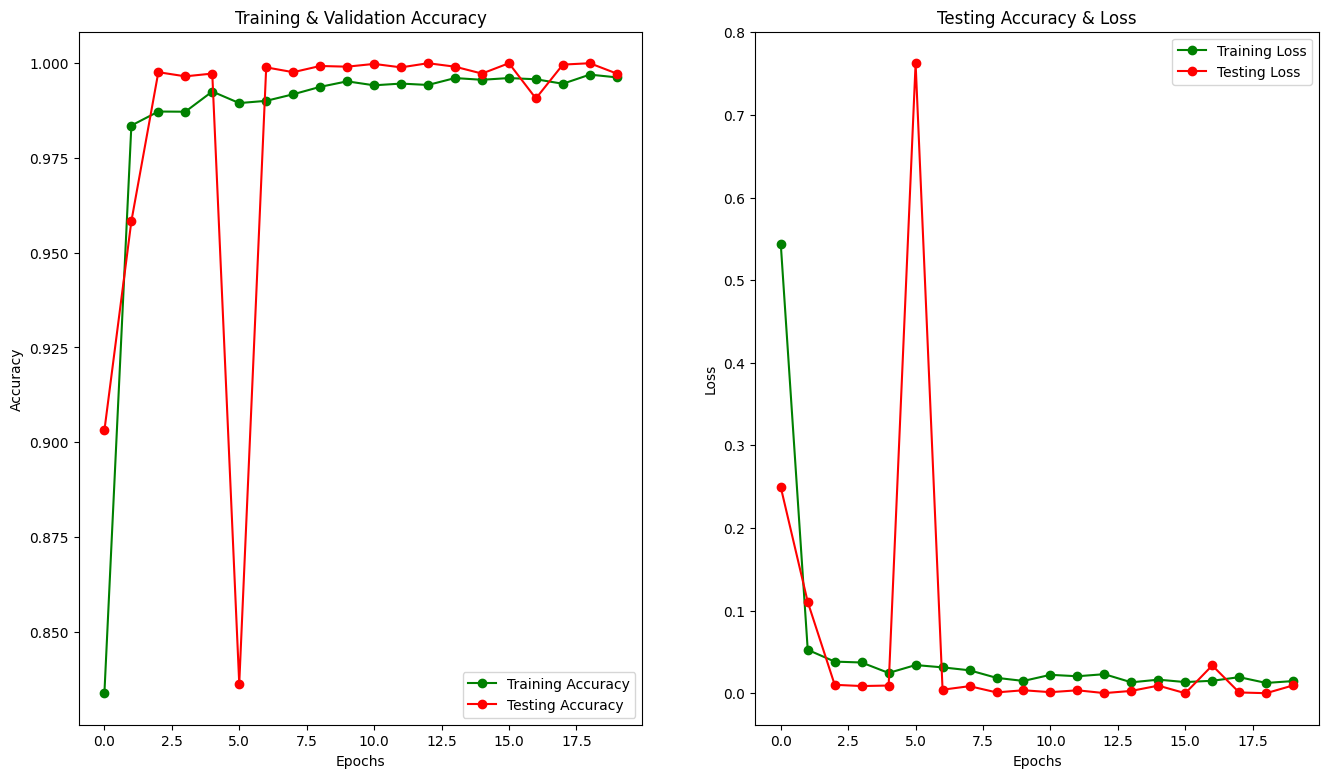

In [22]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [23]:

y_pred = np.argmax(model.predict(x_test), axis=1)


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9665365309537088

In [25]:
y_test

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [26]:
y_pred

array([ 6,  5, 10, ...,  2,  4,  2])

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.97      1.00      0.99       498
           5       1.00      1.00      1.00       247
           6       0.88      1.00      0.94       348
           7       0.95      0.94      0.95       436
           8       0.98      0.98      0.98       288
          10       1.00      0.92      0.96       331
          11       1.00      1.00      1.00       209
          12       0.97      1.00      0.98       394
          13       1.00      0.89      0.94       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.98      0.88      0.93       144
          18       1.00    

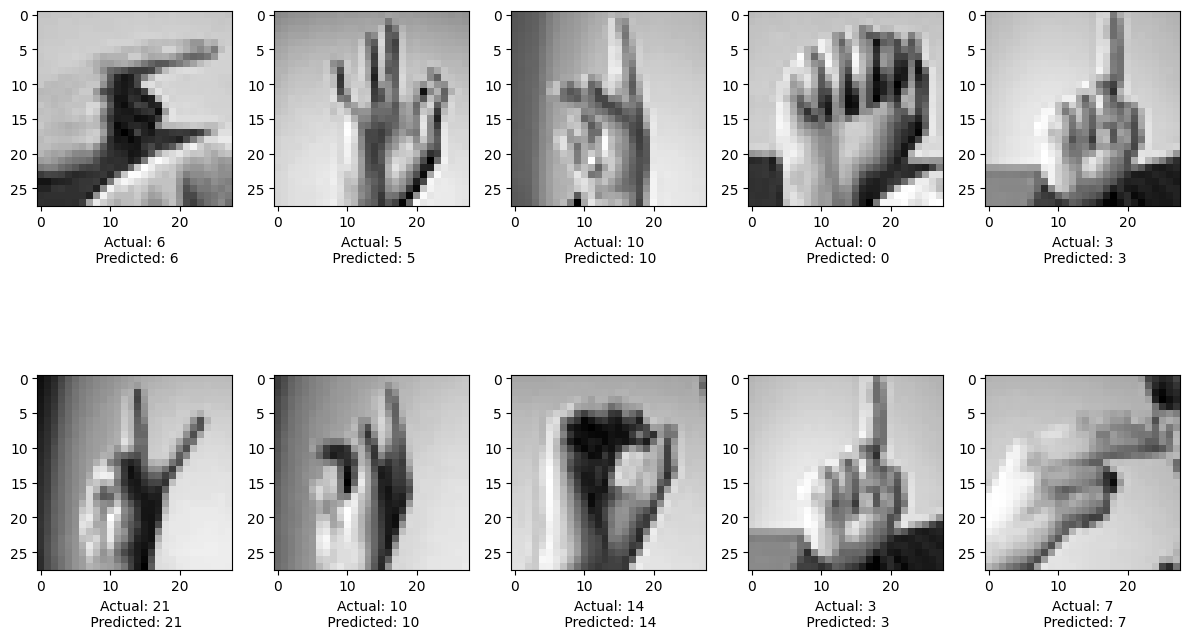

In [28]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.xlabel(f"Actual: {y_test[i]}\n Predicted: {y_pred[i]}")
    
plt.tight_layout()
plt.show()